In [1]:

import h5py 
import pandas as pd
import numpy as np 
import xarray 
import os 

def Dict_to_hdf(Dict , of ):
    HDF = h5py.File(of, 'w')
    for k in Dict :    
        test = HDF.create_dataset( k , data = Dict[k] )
    HDF.close()  
def Sum(L1 , L2):
    L = []
    for l in range(len(L1)) :
        L.append(L1[l] + L2[l]) 
    return L
Folder = "D:/Projects/precipitation_AUS/dataset/0025/"
files = os.listdir(Folder)
hdfs = []

for file in files :
    hdf = h5py.File(Folder + file , 'r+')
    hdfs.append( hdf)
    print(hdf.keys())

kk = [  'CAL_P'  ,    'PDIR'   ,   'ERA5_tp'  , 'ERA5_cape' , 'ERA5_t2m'  ,  'ERA5_tcw'] 


Ld_1 =   6*[ '(3, 3)']#['(7, 7)' , '(19, 19)'  ]     +  4*[ '(3, 3)']
Ld_2 =  6*[ '(5, 5)'] #['(13, 13)' , '(31, 31)']     +  4*[ '(5, 5)']
Ld_3 =  6*[ '(7, 7)'] #['(17, 17)' , '(43, 43)'  ]     +  4*[ '(7, 7)']

#ord_Keys =  ['NAME' ,'STATION' , 'LATITUDE' , 'LONGITUDE' ,  'YEAR'  , 'MONTH'   ,  'DAY'  , 'PRCP' ]  + kk    + Sum([k_ +'_ave_box'  for k_ in kk]  ,  Ld_1 ) + Sum([k_ +'_std_box'  for k_ in kk]  ,  Ld_1 ) +Sum([k_ +'_Ci_box'  for k_ in kk]  ,  Ld_1 ) +Sum([k_ +'_Cj_box'  for k_ in kk]  ,  Ld_1 ) +Sum([k_ +'_ave_box'  for k_ in kk]  ,  Ld_2 ) +Sum([k_ +'_std_box'  for k_ in kk]  ,  Ld_2 ) +Sum([k_ +'_Ci_box'  for k_ in kk]  ,  Ld_2 ) +Sum([k_ +'_Cj_box'  for k_ in kk]  ,  Ld_2 )         + Sum([k_ +'_ave_box'  for k_ in kk]  ,  Ld_3 )  +Sum([k_ +'_std_box'  for k_ in kk]  ,  Ld_3 ) +Sum([k_ +'_Ci_box'  for k_ in kk]  ,  Ld_3 ) +Sum([k_ +'_Cj_box'  for k_ in kk]  ,  Ld_3 )


needed_keys = [  'NAME' ,'STATION' , 'LATITUDE' , 'LONGITUDE' , 
                'YEAR'  , 'MONTH'   ,  'DAY'  , 'PRCP' ,  'state_name',  'state_code'  , 're_PRCP' ,
     'CAL_P'   ,
    'PDIR' , 
    'ERA5_tp'  ,
    'ERA5_cape'  , 
    'ERA5_tcw'  , 
    'ERA5_t2m' , 
    'CNN7'  , 
    'CNN7C'  , 
    'ACO-MLP']

'''    'CNN5'  , 
    'CNN7'  , 
    'CNN3C'  ,
    'CNN5C' ,
    'CNN7C',
    'ACO-MLP'   
    ]
'''
#needed_keys = ord_Keys 

'''    'CNN_RA_(3,3)',
    'CNN_RA_(5,5)',
    'CNN_RA_(7,7)',
    'CNN_RA_C_(3,3)',
    'CNN_RA_C_(5,5)',
    'CNN_RA_C_(7,7)',
    '''


DF = pd.DataFrame()
for k in needed_keys :
    for hdf in hdfs :
        if (k not in list(DF.keys())) and (k in list(hdf.keys())):
            if k == 'ERA5_tp':
                DF[k] = np.array(hdf[k])*24000
            else:
                DF[k] = np.array(hdf[k])

for hdf in hdfs :
    hdf.close()
    

<KeysViewHDF5 ['CAL_P', 'CAL_P(-1)', 'CAL_P(-2)', 'CAL_P(-3)', 'CAL_P(-4)', 'CAL_P(-5)', 'CAL_P_ave', 'DAY', 'DEWP', 'DEWP_ATTRIBUTES', 'Date', 'ELEVATION', 'ERA5_cape', 'ERA5_cape(-1)', 'ERA5_cape(-2)', 'ERA5_cape(-3)', 'ERA5_cape(-4)', 'ERA5_cape(-5)', 'ERA5_msl', 'ERA5_msl(-1)', 'ERA5_msl(-2)', 'ERA5_msl(-3)', 'ERA5_msl(-4)', 'ERA5_msl(-5)', 'ERA5_t2m', 'ERA5_t2m(-1)', 'ERA5_t2m(-2)', 'ERA5_t2m(-3)', 'ERA5_t2m(-4)', 'ERA5_t2m(-5)', 'ERA5_tcw', 'ERA5_tcw(-1)', 'ERA5_tcw(-2)', 'ERA5_tcw(-3)', 'ERA5_tcw(-4)', 'ERA5_tcw(-5)', 'ERA5_tp', 'ERA5_tp(-1)', 'ERA5_tp(-2)', 'ERA5_tp(-3)', 'ERA5_tp(-4)', 'ERA5_tp(-5)', 'FRSHTT', 'GUST', 'HQ_P', 'HQ_P(-1)', 'HQ_P(-2)', 'HQ_P(-3)', 'HQ_P(-4)', 'HQ_P(-5)', 'LATITUDE', 'LONGITUDE', 'LSTM_RA_0', 'LSTM_RA_0(-1)', 'LSTM_RA_0(-2)', 'LSTM_RA_0(-3)', 'LSTM_RA_0(-4)', 'LSTM_RA_1', 'LSTM_RA_2', 'LSTM_RA_3', 'LSTM_RA_3(-1)', 'LSTM_RA_3(-2)', 'LSTM_RA_3(-3)', 'LSTM_RA_3(-4)', 'LSTM_RA_4', 'LSTM_RA_4(-4)', 'MAX', 'MAX_ATTRIBUTES', 'MIN', 'MIN_ATTRIBUTES', 'MON

In [2]:
DF['IMERG'] = DF['CAL_P']
DF['CNN']  = DF['CNN7']
DF['CNN cent']  = DF['CNN7C']

In [3]:
def Decode( List, Format ):
    a = [ ]
    for l in List:
        a.append(   l.decode(Format))
    return np.array(a)

In [4]:
DF['state_name'] = Decode( List =list( DF['state_name']), Format = 'utf-8')
DF['NAME'] = Decode( List =list( DF['NAME']), Format = 'utf-8')

In [25]:

kk = [  're_CAL_P'  ,    're_PDIR'   ,   're_ERA5_tp'  , 're_ERA5_cape' , 're_ERA5_t2m'  ,  're_ERA5_tcw'] 
new_names = ['re_PRCP'] + kk   + Sum([k_ +'_ave_box'  for k_ in kk]  ,  Ld_1 ) + Sum([k_ +'_std_box'  for k_ in kk]  ,  Ld_1 ) +Sum([k_ +'_Ci_box'  for k_ in kk]  ,  Ld_1 ) +Sum([k_ +'_Cj_box'  for k_ in kk]  ,  Ld_1 ) +Sum([k_ +'_ave_box'  for k_ in kk]  ,  Ld_2 ) +Sum([k_ +'_std_box'  for k_ in kk]  ,  Ld_2 ) +Sum([k_ +'_Ci_box'  for k_ in kk]  ,  Ld_2 ) +Sum([k_ +'_Cj_box'  for k_ in kk]  ,  Ld_2 )         + Sum([k_ +'_ave_box'  for k_ in kk]  ,  Ld_3 )  +Sum([k_ +'_std_box'  for k_ in kk]  ,  Ld_3 ) +Sum([k_ +'_Ci_box'  for k_ in kk]  ,  Ld_3 ) +Sum([k_ +'_Cj_box'  for k_ in kk]  ,  Ld_3 )


In [ ]:
th = 57 # mm
yr = 2020
df_th =  DF[  DF['PRCP'] >=  th ]
df_th = df_th[df_th['YEAR'] > yr]
names = df_th['NAME'].unique()
out = []
for name in names:
    df_name = df_th[  df_th['NAME']  == name]
    n = len(df_name)
    if n !=0 :
        out.append( [  df_name['NAME'].values[0].decode('ascii')  , df_name['LATITUDE'].values[0] ,df_name['LONGITUDE'].values[0]  ,float( n )   ]) 
out = np.array(out )

df_out= pd.DataFrame(out , columns=[ 'NAME'  , 'LATITUDE' , 'LONGITUDE' ,'n']  )
df_out.to_excel(r'../results/obs_analyze/ext-test.xlsx')


In [5]:
products  =   ['PRCP' , 'CAL_P',
 'PDIR',
 'ERA5_tp',
 'ERA5_cape',
 'ERA5_tcw',
 'ERA5_t2m',
 'CNN7',
 'CNN7C',
 'ACO-MLP']

In [9]:
new_names  = [ ]
for p in products : new_names.append('re_' + p)

In [10]:
new_names

['re_PRCP',
 're_CAL_P',
 're_PDIR',
 're_ERA5_tp',
 're_ERA5_cape',
 're_ERA5_tcw',
 're_ERA5_t2m',
 're_CNN7',
 're_CNN7C',
 're_ACO-MLP']

In [ ]:
# Rescale 
stations = np.unique( DF['STATION'])
LIST = [ ]

for st in stations :
    DF_q = DF[ DF['STATION'] == st]
    DF_m = DF_q[products] #[DF_q['MONTH']==month][products]
    DF_e =( DF_m - DF_m.mean() ) / DF_m.std()
    LIST.append(DF_e)
DF_ev = pd.concat(LIST)
DF_ev = DF_ev.sort_index()
DF_ev.columns = np.array(new_names)
for k in needed_keys[:7] :    DF_ev[k] = DF[k]
#Dict_to_hdf(DF_ev , r'../dataset/0025/joint_rescale.hdf5' )

In [5]:
DF_ev = DF[DF['YEAR'] >= 2021]

# 1. Overal Evaluation 

In [6]:
# Evaluation Dataframe

import evaluation_tools
products = ['re_PRCP',
 'state_name',
 'IMERG',
 'PDIR',
 'ERA5_tp',
'ERA5_cape'  , 
'ERA5_tcw'  , 
'ERA5_t2m' ,
 'CNN',
 'CNN cent',
 'ACO-MLP'] 

df = {}
df['test']  = DF_ev[DF_ev['YEAR']>2020]
t = 'test'
obs_key = 'PRCP'
ev_df = pd.DataFrame()

test = DF_ev[DF_ev['YEAR'] > 2020]
for k in list(test.keys()):
    df['test'][k]   = np.array(test[k])

dft = df['test']



In [ ]:
Feb_2022_23 = df['test'][df['test']['YEAR'] == 2022][df['test']['MONTH'] == 2][df['test']['DAY'] ==23  ][df['test']['LATITUDE']  < -24.81 ][df['test']['LATITUDE']  > -37.35] [df['test']['LONGITUDE']  < 154.47][df['test']['LONGITUDE']  > 145.6] 
March_2021_18 = df['test'][df['test']['YEAR'] == 2021][df['test']['MONTH'] == 3 ][df['test']['DAY'] == 18 ][df['test']['LONGITUDE']  > 148][df['test']['LATITUDE']  < -28.6][df['test']['LATITUDE']  > -36]
May_2022_10 = df['test'][df['test']['YEAR'] == 2022][df['test']['MONTH'] == 5][df['test']['DAY'] == 10][df['test']['LONGITUDE'] >  141][df['test']['LATITUDE'] > -28.6]
Jan_2023_16  = df['test'][df['test'] ['YEAR']  == 2023 ][df['test'] ['MONTH']  == 1 ][df['test'] ['DAY']  == 15 ][df['test']['LONGITUDE'] >  141][df['test']['LATITUDE'] > -28.6]
Disasters = { 
     '2022-02-23' : Feb_2022_23, 
     '2021-03-18' : March_2021_18,
     '2022-05-10' : May_2022_10,
     '2023-01-16' : Jan_2023_16
}


In [34]:
exclude = [94595899999  ,  94786099999  , 94719099999 ] 
for station in exclude :
    Feb_2022_23  = Feb_2022_23[Feb_2022_23['STATION'] != station]

In [80]:
Feb_2022_23[Feb_2022_23['PRCP'] > 45 ].shape

(11, 23)

In [ ]:
out_result ={}
products = [  'PDIR'  , 'ERA5_tp', 'IMERG'   , 'CNN7' , 'CNN7C'  , 'ACO-MLP']

df_test = dft
for m in products:
    predicted = np.array(df_test[m])
    obs_ =  np.array(df_test['PRCP'])
    result = evaluation_tools.evaluation_criteria(obs_ ,predicted  , threshold_heavy= 25  , threshold_ex= 57 ) 
    out_result[m] = result
out_result = pd.DataFrame(out_result)
out_result

In [83]:
out_result.T.to_excel(r'D:\Projects\precipitation_AUS\23-Feb_20222_final.xlsx')

In [63]:
df['test']['ERA5_tp' ].max()

379.02094401646445

In [55]:

products = new_names

for disaster in Disasters : 
    out_result = {}
    df_test = Disasters[disaster]
    obs_disaster  = np.array(df_test['re_PRCP'])
    for m in products:
        predicted = np.array(df_test[m])
        '''if m == 'ERA5_tp' : 
            predicted = predicted *24*1000'''
        result = evaluation_tools.evaluation_criteria(obs_disaster ,predicted ) 
        out_result[m] = result
    out_result = pd.DataFrame(out_result)
    ex_out = out_result.T
    ex_out['Product']  = list(ex_out.index)
    ex_out.to_excel(r'D:\Projects\precipitation_AUS\new_results/'+disaster + 'rescaled.xlsx')


c:\Users\S4055367\AppData\Local\anaconda3\envs\ML\Lib\site-packages\evaluation_tools.py:113: RuntimeWarning: invalid value encountered in scalar divide
  nse  = 1 - ( numpy.sum((Model-Obs)**2) / numpy.sum((Obs-numpy.mean(obs_ref ))**2 ))
c:\Users\S4055367\AppData\Local\anaconda3\envs\ML\Lib\site-packages\evaluation_tools.py:117: RuntimeWarning: invalid value encountered in scalar divide
  pbias =  100*numpy.sum(Model-Obs)/numpy.sum(Obs)
c:\Users\S4055367\AppData\Local\anaconda3\envs\ML\Lib\site-packages\evaluation_tools.py:119: RuntimeWarning: invalid value encountered in scalar divide
  r = np.sum( (Obs -obs_ref.mean())  *  (Model -  model_ref.mean()) )   / sqrt( np.sum( (Obs -  obs_ref.mean())**2)  *  np.sum((Model -model_ref.mean())**2 ))
c:\Users\S4055367\AppData\Local\anaconda3\envs\ML\Lib\site-packages\evaluation_tools.py:113: RuntimeWarning: invalid value encountered in scalar divide
  nse  = 1 - ( numpy.sum((Model-Obs)**2) / numpy.sum((Obs-numpy.mean(obs_ref ))**2 ))
c:\Users\S

In [67]:
ex_out

,r,NSE,RMSE,MAE,MBE,PBIAS,KGE,spearman,std,obs_std,...,POD_heavy,FAR_heavy,BIAS_heavy,CSI_heavy,POD_ex,FAR_ex,BIAS_ex,CSI_ex,KS,P_value(t-test)
IMERG,0.739731,0.462322,15.387778,8.868432,-3.955746,-30.650235,0.596097,0.517601,20.185148,20.985282,...,0.500000,0.142857,0.583333,0.461538,0.875,0.222222,1.125,0.700000,-1.0,NaN
PDIR,0.585565,0.143265,19.423977,10.277971,-6.145217,-47.614877,0.364074,0.375560,19.369614,20.985282,...,0.375000,0.100000,0.416667,0.360000,0.375,0.250000,0.500,0.333333,-1.0,NaN
ERA5_tp,0.639707,0.394168,16.333943,10.577072,0.691713,5.359589,0.562628,0.583388,15.904826,20.985282,...,0.625000,0.375000,1.000000,0.454545,0.000,1.000000,0.375,0.000000,-1.0,NaN
CNN,0.836608,0.645075,12.502110,7.414101,-0.405499,-3.141917,0.819495,0.653500,22.453979,20.985282,...,0.458333,0.000000,0.458333,0.458333,0.875,0.125000,1.000,0.777778,-1.0,NaN
CNN cent,0.838981,0.702264,11.450656,7.506608,-0.278893,-2.160943,0.796253,0.677632,18.404976,20.985282,...,0.541667,0.133333,0.625000,0.500000,0.625,0.375000,1.000,0.454545,-1.0,NaN
ACO-MLP,0.838630,0.552485,14.038426,8.395906,2.861176,22.169200,0.659272,0.677632,25.229711,20.985282,...,0.625000,0.166667,0.750000,0.555556,0.875,0.300000,1.250,0.636364,-1.0,NaN


## 10 May 2022 

## 18 MArch 2021

In [51]:
disaster_18_March_2021 = dft[dft['YEAR'] == 2021][dft['MONTH'] == 3 ][dft['DAY'] == 18 ][dft['LONGITUDE']  > 148][dft['LATITUDE']  < -28.6][dft['LATITUDE']  > -36]

disaster_18_March_2021.to_excel(r'D:\Projects\precipitation_AUS\dataset/18MArch2021/disaster_18_March_2021.xlsx')

C:\Users\S4055367\AppData\Local\Temp\ipykernel_516\3493677374.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disaster_18_March_2021 = dft[dft['YEAR'] == 2021][dft['MONTH'] == 3 ][dft['DAY'] == 18 ][dft['LONGITUDE']  > 148][dft['LATITUDE']  < -28.6][dft['LATITUDE']  > -36]
C:\Users\S4055367\AppData\Local\Temp\ipykernel_516\3493677374.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disaster_18_March_2021 = dft[dft['YEAR'] == 2021][dft['MONTH'] == 3 ][dft['DAY'] == 18 ][dft['LONGITUDE']  > 148][dft['LATITUDE']  < -28.6][dft['LATITUDE']  > -36]
C:\Users\S4055367\AppData\Local\Temp\ipykernel_516\3493677374.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disaster_18_March_2021 = dft[dft['YEAR'] == 2021][dft['MONTH'] == 3 ][dft['DAY'] == 18 ][dft['LONGITUDE']  > 148][dft['LATITUDE']  < -28.6][dft['LATITUDE']  > -36]
C:\Users\S4055367\AppData\Local\Temp\ipykernel_516\3493677374.py:1: Us

In [52]:
dft =  disaster_18_March_2021

In [6]:
dft = dft[dft['LATITUDE']  < -24.81 ][dft['LATITUDE']  > -37.35] [dft['LONGITUDE']  < 154.47][dft['LONGITUDE']  > 145.6] 

C:\Users\S4055367\AppData\Local\Temp\ipykernel_15020\3587304593.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dft = dft[dft['LATITUDE']  < -24.81 ][dft['LATITUDE']  > -37.35] [dft['LONGITUDE']  < 154.47][dft['LONGITUDE']  > 145.6]
C:\Users\S4055367\AppData\Local\Temp\ipykernel_15020\3587304593.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dft = dft[dft['LATITUDE']  < -24.81 ][dft['LATITUDE']  > -37.35] [dft['LONGITUDE']  < 154.47][dft['LONGITUDE']  > 145.6]
C:\Users\S4055367\AppData\Local\Temp\ipykernel_15020\3587304593.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dft = dft[dft['LATITUDE']  < -24.81 ][dft['LATITUDE']  > -37.35] [dft['LONGITUDE']  < 154.47][dft['LONGITUDE']  > 145.6]


In [53]:
out = []
for m in products :
    ev = evaluation_tools.evaluation_criteria(  np.array(dft[obs_key])  , np.array( dft[m])  , th =1 , threshold_heavy= 25  , threshold_ex= 60 ) 
    out.append(ev) 

out = pd.DataFrame(out , index = products)
result = out.T
of = '../new_results/RESULT_disaster_18_March_2022.xlsx' 
result.to_excel(of)



# CDF

In [15]:
data = DF[DF['PRCP']>1 ]['PRCP'].values
so = np.sort(data)
p = np.arange(1,len(data)+1 ) / (len(data)+1)
df = pd.DataFrame(  {'P (mm)' : so , 'CDF': p})
q_df = df[df['CDF'] < 0.999 ]

# 95 and 99 precipitation percentiles

In [10]:
def Pecentile(data):
    so = np.sort(data)
    p = np.arange(1,len(data)+1 ) / (len(data)+1)
    df = pd.DataFrame(  {'so' : so , 'p': p})
    return df


In [62]:
variable = 'PRCP'
category = 'NAME'

unq = np.unique(DF[[category]])

df_v = DF[[variable , category]]

df_v = df_v[df_v[variable] !=0 ] 

out = []
for u in unq :
    df_u = df_v[df_v[category] == u] 
    data = df_u[variable].values
    df = Pecentile(data)
    try:
        P_95 =  df[df['p'] >.95 ]['so'].values[0]
        P_99 =  df[df['p'] >.99 ]['so'].values[0]
        out.append( [u , P_95  , P_99 ])
    except :
        pass

out = pd.DataFrame(out, columns= ['name' , 'P_95'  , 'P_99'])



In [ ]:
fp = r'D:\Projects\precipitation_AUS\results\percentiles/stations_percentiles.xlsx'
out.to_excel(fp)

# Seasonal Evaluation

In [ ]:
df['test']['season'] = np.array(df['test']['MONTH'] / 3.1 ).astype(int)+1

In [98]:
dft = df['test']

In [ ]:
KEY = 'STATE_CODE'
uniqs = dft[KEY].unique()
Folder = '../results/'+KEY+'/'

try:
    os.mkdir(Folder)
except: 
    pass 


for s in uniqs:
    df_s = dft[dft[KEY] == s]
    out = []
    for m in ms :
        ev = evaluation_tools.evaluation_criteria(  np.array(df_s[obs_key])  , np.array( df_s[m])  , th =1 , threshold_heavy= 25  , threshold_ex= 60 ) 
        out.append(ev) 
    out = pd.DataFrame(out , index = ms)
    result = out.T
    result.to_excel(Folder + KEY+'_' + str(s) + '.xlsx')


        

In [153]:
import geopandas as gpd
# Load the point shape file and country shape file
country = gpd.read_file(r'D:\Projects\precipitation_AUS\GIS\Data\country_GCS1984.shp')
country = country.drop(9)
country = country.drop(8)
country = country.drop(7)
country = country.drop(5)



In [156]:
KEY = 'STATE_CODE'
uniqs = dft[KEY].unique()
Folder = '../results/'+KEY+'/'
cr ='CSI_ex'

out_state = pd.DataFrame()

for u in uniqs:
    ex = pd.read_excel(Folder + KEY+'_' + str(u) + '.xlsx')
    exT = pd.DataFrame(ex.values[: , 1:].T  , index= list(ex.keys())[1:] , columns=ex['Unnamed: 0'].values)
    try:
        state = country[country['STATE_CODE'] == str(u) ].index[0]
        out_state[state]  = exT[cr]
    except: 
        pass

out_state = out_state.T.sort_index()

out_state.columns = [
    'IMERG'   ,
    'PDIR' , 
    'ERA5tp'  ,   
    'CNN3',
    'CNN5',
    'CNN7',
    'CNN3C',
    'CNN5C',
    'CNN7C',
    'ACO-NN' ] 

for k in out_state.keys():
    country[k]  = out_state[k]
country.to_file('../results/STATE_result_shp/'+cr+'.shp')




# Scatter plot for two variables

<Axes: xlabel='ACO-NN', ylabel='PRCP'>

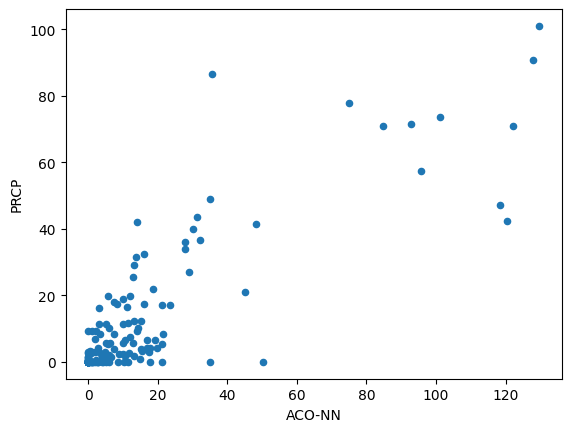

In [22]:
var_1 = 'ACO-NN'
var_2 = 'PRCP'

dft.plot.scatter(x=var_1 ,
                y=var_2 )
                

In [28]:
np.corrcoef( dft[var_1]   , dft[var_2])

array([[1.        , 0.86701995],
       [0.86701995, 1.        ]])

In [20]:
dft_

,ERA5_tp,PRCP
1014261,-0.498957,-0.356737
1015383,-0.498957,-0.356737
1016507,-0.498957,-0.356737
1017619,-0.492811,-0.356737
1018736,-0.493031,-0.339235
...,...,...
1506606,0.395747,0.500851
1507727,-0.383779,-0.146716
1508844,-0.484635,-0.356737
1509965,-0.465924,-0.356737


# Density Scatterplot

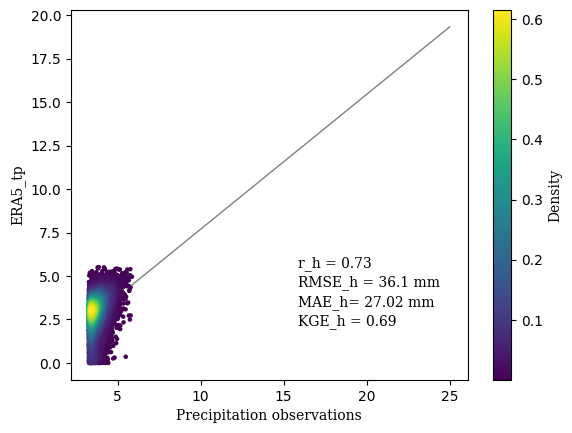

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import evaluation_tools
KGE = evaluation_tools.KGE
var_1 =  'PRCP'
from matplotlib import cm

Vars = ['ERA5_tp'   ]

dft_ = dft[Vars+['PRCP']]

# dft_ =  (dft_ - dft_.mean() ) / dft_.std()


th = 25

if th == 60 : c ='e'
if th == 25 : c = 'h'

dft_q = dft_[ dft_['PRCP'] >= th ] # [dft['STATE_CODE'] == 5]

# Generate fake data
var_labels =  [ 'ERA5_tp' ] 



obs_lbl = 'Precipitation observations'
out_folder = '../Fig/auxilary/'

try: os.mkdir(out_folder)
except: pass

from matplotlib.colors import NoNorm

from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

import matplotlib as mpl
cmap = mpl.colormaps['viridis']


for i in range(len(Vars)):  
    
    var_2 = Vars[i]

    x = np.log( np.array(dft_q[var_1])  + 1)
    y =  np.log( np.array(dft_q[var_2]) +1)


    # Calculate the point density
    # Calculate the point density

    xy = np.vstack([x,y])

    z = gaussian_kde(xy)(xy)

    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]

    fig, ax = plt.subplots()
    ax.scatter(x, y, c=z, s=5)
    b, a = np.polyfit(x, y, deg=1)

    # Create sequence of 100 numbers from 0 to 100
    xseq = np.linspace(th, max(x)  , num=100  )
    # Plot regression line
    ax.plot(xseq, a + b * xseq, color="grey", lw=1 )


    Rslt = evaluation_tools.scal_eval_ref(  dft_q[var_1]   , dft_q[var_2] , dft[var_1]   , dft[var_2]  )
    
    txt_x = np.max(x) + 10
    txt_y  = np.max(y) 
    sps = txt_y /5
 
    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)

    # cbar = fig.colorbar(N_, ax=ax )

    cbar.ax.set_ylabel('Density' , family = 'serif' ,  fontsize= 'medium')

    plt.text(txt_x , txt_y, 'r_'+c+' = ' + str(round(Rslt['r'] , 2) ), family = 'serif' ,  fontsize= 'medium' )
    plt.text(txt_x, txt_y-sps, 'RMSE_'+c+' = ' + str(round(Rslt['rmse'] , 2)) + ' mm', family = 'serif' ,  fontsize= 'medium' )
    plt.text(txt_x, txt_y-2*sps, 'MAE_'+c+'= ' + str(round(Rslt['mae'] , 2)) + ' mm', family = 'serif' ,  fontsize= 'medium' )
    plt.text(txt_x, txt_y-3*sps, 'KGE_'+c+' = ' + str(round(Rslt['kge'] , 2)) , family = 'serif' ,  fontsize= 'medium' )
    
    plt.xlabel(obs_lbl , family = 'serif' ,  fontsize= 'medium')
    plt.ylabel(var_labels[i], family = 'serif' ,  fontsize= 'medium')
    #plt.show()
    plt.savefig(out_folder  + var_labels[i]+'-' +c+'.JPEG', dpi=1000, bbox_inches="tight")







In [18]:
dft_

,ERA5_tp,PRCP
1013846,-0.322366,-0.260141
1013847,-0.285463,-0.260141
1013848,-0.321968,-0.260141
1013849,-0.306948,-0.260141
1013850,-0.322067,-0.260141
...,...,...
1512030,-0.322764,-0.260141
1512031,-0.322764,-0.260141
1512032,-0.322764,-0.260141
1512033,-0.322764,-0.260141


In [138]:
ddf = pd.DataFrame()
ddf['x']  = x
ddf['y']  =  y 
ddf['z']  = z 
n_ = len(ddf)

In [179]:
qq = ddf[ ddf.x > 60][ddf.x < 61 ][ ddf.y > 100 ][ddf.y < 120 ]
len(qq) **2/ n_ **2

C:\Users\S4055367\AppData\Local\Temp\ipykernel_23308\4250677700.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  qq = ddf[ ddf.x > 60][ddf.x < 61 ][ ddf.y > 100 ][ddf.y < 120 ]
C:\Users\S4055367\AppData\Local\Temp\ipykernel_23308\4250677700.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  qq = ddf[ ddf.x > 60][ddf.x < 61 ][ ddf.y > 100 ][ddf.y < 120 ]
C:\Users\S4055367\AppData\Local\Temp\ipykernel_23308\4250677700.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  qq = ddf[ ddf.x > 60][ddf.x < 61 ][ ddf.y > 100 ][ddf.y < 120 ]


1.31211382849885e-06

In [183]:
xseq

(array([ 50.        ,  53.53535354,  57.07070707,  60.60606061,
         64.14141414,  67.67676768,  71.21212121,  74.74747475,
         78.28282828,  81.81818182,  85.35353535,  88.88888889,
         92.42424242,  95.95959596,  99.49494949, 103.03030303,
        106.56565657, 110.1010101 , 113.63636364, 117.17171717,
        120.70707071, 124.24242424, 127.77777778, 131.31313131,
        134.84848485, 138.38383838, 141.91919192, 145.45454545,
        148.98989899, 152.52525253, 156.06060606, 159.5959596 ,
        163.13131313, 166.66666667, 170.2020202 , 173.73737374,
        177.27272727, 180.80808081, 184.34343434, 187.87878788,
        191.41414141, 194.94949495, 198.48484848, 202.02020202,
        205.55555556, 209.09090909, 212.62626263, 216.16161616,
        219.6969697 , 223.23232323, 226.76767677, 230.3030303 ,
        233.83838384, 237.37373737, 240.90909091, 244.44444444,
        247.97979798, 251.51515152, 255.05050505, 258.58585859,
        262.12121212, 265.65656566, 269.

5.2484553139954e-06

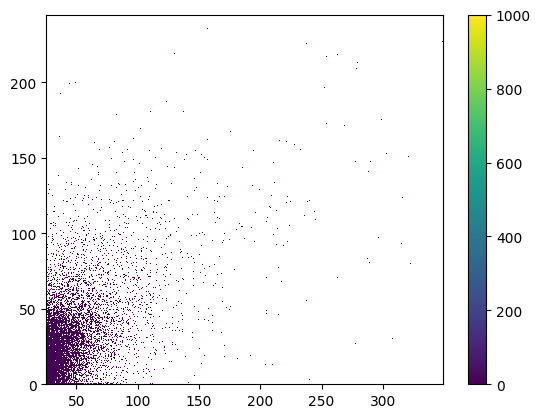

In [125]:
import datashader as ds
from datashader.mpl_ext import dsshow
import pandas as pd


def using_datashader(ax, x, y):

    df = pd.DataFrame(dict(x=x, y=y))
    dsartist = dsshow(
        df,
        ds.Point("x", "y"),
        ds.count(),
        vmin=0,
        vmax=1000,
        norm="linear",
        aspect="auto",
        ax=ax,
    )

    plt.colorbar(dsartist)


fig, ax = plt.subplots()
using_datashader(ax, x, y)
plt.show()

In [127]:
pip install mpl_scatter_density

  Using cached mpl_scatter_density-0.7-py3-none-any.whl.metadata (12 kB)
  Using cached fast_histogram-0.14-cp39-abi3-win_amd64.whl.metadata (6.9 kB)
Using cached mpl_scatter_density-0.7-py3-none-any.whl (655 kB)
Using cached fast_histogram-0.14-cp39-abi3-win_amd64.whl (24 kB)
Note: you may need to restart the kernel to use updated packages.


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots()
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

    ax.scatter( x, y, c=z, **kwargs )

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density')

    return ax

<Axes: >

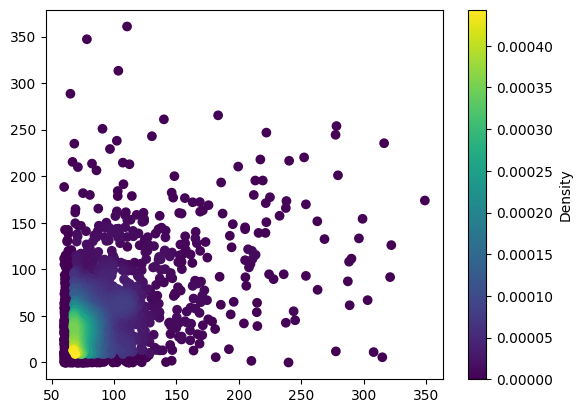

In [89]:
density_scatter( x , y )

In [55]:
np.round(N_ , 2 )

array([0.01, 0.01, 0.01, ..., 7.96, 7.96, 7.96])

array(<module 'matplotlib.pyplot' from 'c:\\Users\\S4055367\\AppData\\Local\\anaconda3\\envs\\ML\\Lib\\site-packages\\matplotlib\\pyplot.py'>,
      dtype=object)

In [29]:
250/15

16.666666666666668

In [41]:
dft_q

,NAME,LATITUDE,LONGITUDE,YEAR,MONTH,DAY,PRCP,STATE_CODE,CAL_P,PDIR(0),ERA5_tp,"CNN_RA_(3,3)","CNN_RA_(5,5)","CNN_RA_(7,7)","CNN_RA_C_(3,3)","CNN_RA_C_(5,5)","CNN_RA_C_(7,7)",ACO-NN,BP-ACO
1014010,b'ADELAIDE INTERNATIONAL',-34.945000,138.530556,2021,6,17,29.28,1,55.394390,19.0,8.600662,12.593671,14.008617,14.640783,8.024201,10.447238,11.417089,14.502122,20.346741
1014743,b'ADELAIDE INTERNATIONAL',-34.945000,138.530556,2023,6,22,28.80,1,53.702023,14.0,22.804142,21.490875,21.339764,21.722807,15.326818,6.742801,12.658014,16.241782,17.927923
1014901,b'ADELAIDE INTERNATIONAL',-34.945000,138.530556,2023,11,27,36.00,1,67.204308,10.0,14.896154,15.294063,14.166225,14.103097,13.035982,13.733976,14.001771,18.125603,16.081543
1014913,b'ADELAIDE INTERNATIONAL',-34.945000,138.530556,2023,12,9,26.88,1,19.224054,5.0,32.954406,19.973356,19.293543,21.238188,20.957462,10.567358,12.214864,15.620527,11.822959
1014960,b'ADELAIDE INTERNATIONAL',-34.945000,138.530556,2024,1,25,33.84,1,13.613901,1.0,14.524083,7.708112,8.850046,9.321247,9.023709,8.655286,12.771698,16.401156,9.553175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511006,b'FRANKSTON BALLAM PARK',-35.667000,145.617000,2022,10,7,32.64,1,0.715731,1.0,10.315124,3.326103,4.989300,3.734311,6.562785,5.774795,5.753953,6.562934,4.057436
1511196,b'FRANKSTON BALLAM PARK',-35.667000,145.617000,2023,4,15,33.60,1,11.405369,4.0,22.926922,12.803965,13.418414,13.745436,13.785551,12.572190,11.879705,15.150666,15.486943
1511450,b'FRANKSTON BALLAM PARK',-35.667000,145.617000,2023,12,25,36.72,1,1.297188,3.0,8.143944,5.676707,5.821365,2.923830,4.915853,2.770480,2.239877,1.636528,2.944076
1511463,b'FRANKSTON BALLAM PARK',-35.667000,145.617000,2024,1,7,46.08,1,7.512732,13.0,24.837339,14.268798,12.288119,14.786316,12.728420,12.683226,11.995386,15.312839,16.423982


# Exracting stations lat and long

In [36]:
dft = df['test']
names = np.unique(  df['test']['NAME'])
Lat =[]
Long = []
for name in names :
    Lat .append( dft[dft['NAME'] == name ]['LATITUDE'].values[0])
    Long .append( dft[dft['NAME'] == name ]['LONGITUDE'].values[0])
Lat = np.array(Lat)
Long = np.array(Long)
Geo = pd.DataFrame({ 'X'  : Long  , 'Y' : Lat } , index=names)

In [4]:
dft  =df['test']

In [29]:
products

['PRCP',
 'state_name',
 'state_code',
 'CAL_P',
 'PDIR',
 'ERA5_tp',
 'CNN7',
 'CNN7C',
 'ACO-MLP']

# Results by stations

In [35]:
Results_by_name  = {}
dft = df['test']
products  =[
 'IMERG',
 'PDIR',
 'ERA5_tp',
 'CNN',
 'CNN cent',
 'ACO-MLP']

k_name =  'state_name'
names = list(dft[k_name].unique())
o =[ ]

for name in names :
    df_name = dft[dft[k_name] == name ]
    ave = df_name[['LATITUDE' , 'LONGITUDE']].mean()
    o.append((list(ave.values) +[ name ]))
    R = {}
    for p in products :
        R[p] = evaluation_tools.evaluation_criteria( df_name[obs_key].values  ,  df_name[p].values ) 
    Results_by_name[name] = R
    

o = pd.DataFrame(o) 


'''
o.columns = ['lat' , 'lon' , 'state']
o.to_excel(r"D:\Projects\precipitation_AUS\results\RESULTS-disaster_18_March_2021-by_state\states.xlsx")    '''

<>:28: SyntaxWarning: invalid escape sequence '\P'
<>:28: SyntaxWarning: invalid escape sequence '\P'
C:\Users\S4055367\AppData\Local\Temp\ipykernel_29484\2653314042.py:28: SyntaxWarning: invalid escape sequence '\P'
  '''
c:\Users\S4055367\AppData\Local\anaconda3\envs\ML\Lib\site-packages\evaluation_tools.py:113: RuntimeWarning: invalid value encountered in scalar divide
  nse  = 1 - ( numpy.sum((Model-Obs)**2) / numpy.sum((Obs-numpy.mean(obs_ref ))**2 ))
c:\Users\S4055367\AppData\Local\anaconda3\envs\ML\Lib\site-packages\evaluation_tools.py:117: RuntimeWarning: invalid value encountered in scalar divide
  pbias =  100*numpy.sum(Model-Obs)/numpy.sum(Obs)
c:\Users\S4055367\AppData\Local\anaconda3\envs\ML\Lib\site-packages\evaluation_tools.py:119: RuntimeWarning: invalid value encountered in scalar divide
  r = np.sum( (Obs -obs_ref.mean())  *  (Model -  model_ref.mean()) )   / sqrt( np.sum( (Obs -  obs_ref.mean())**2)  *  np.sum((Model -model_ref.mean())**2 ))


'\no.columns = [\'lat\' , \'lon\' , \'state\']\no.to_excel(r"D:\\Projects\\precipitation_AUS\results\\RESULTS-disaster_18_March_2021-by_state\\states.xlsx")    '

# Results 3D DataFrame

In [36]:
class Result:
    def __init__(self, Dict):
        self.Dict = Dict
        self.names =   np.array( list( Dict.keys()))
        self.products = np.array(  list(Dict[self.names[0]].keys()))
        self.criteria = np.array(  list(Dict[self.names[0]][self.products[0]].keys()))
        
    def dataframe(self):
        self.dfs = { }
        self.array = [ ]
        for name in self.names :
            self.dfs[name] =  pd.DataFrame(self.Dict[name])
            self.array.append(self.dfs[name].values) 
        self.array  =  np.array(self.array)

    def call_criteria(self,criterion):
        I = np.where( self.criteria == criterion)[0]
        A = self.array[: , I , :]
        return  pd.DataFrame(A[: , 0 , :] ,  index=  self.names  , columns=self.products  )
    
    def call_name(self, name):
        return self.dfs[name]
    
    def call_product(self, product ):
        I = np.where( self.products == product)[0]
        A = self.array[: , : , I]
        return  pd.DataFrame(A[: , : , 0 ] ,  index=  self.names  , columns=self.criteria  )
        



In [37]:
result_obj = Result(Results_by_name)
result_obj.dataframe()
result_obj.array.shape

(8, 44, 6)

In [41]:

for name in names:
    ex = result_obj.call_name(name)
    exT = ex.T
    exT['Product'] = list(exT.index)
    exT.to_excel( f'../new_results/RESULTS-by_state/state_' + str(name) + '.xlsx')
    

In [23]:
df_r = result_obj.call_criteria('r')

In [25]:
df_r.to_excel( r"D:\Projects\precipitation_AUS\new_results\r.xlsx")

## save Results Dataframe

In [88]:

import pickle

with open(f'../results/RESULTS-disaster_18_March_2021-by_states.pickle', 'wb') as file:
    pickle.dump(result_obj, file) 

## Load Results Dataframe

In [80]:
import pickle

with open(f'../results/RESULTS-disaster_18_March_2021.pickle', 'rb') as f2:
    result_obj = pickle.load(f2)

    

# Export Results by criteria

In [40]:
Folder = r'D:\Projects\precipitation_AUS/new_results/Criteria/'

try: os.mkdir(Folder)
except: pass

for crit in result_obj.criteria :
    r = result_obj.call_criteria(crit)
    rcon = pd.concat([r , Geo ] , axis=1   ) 
    rcon.to_excel(Folder + crit + '.xlsx' )

# Criteria results to shapefile

In [ ]:
import os
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd


pr = [
   
    'name' ,
    'CAL_P'   ,
    'PDIR' , 
    'ERA5_tp'  ,   
    'CNN7',
    'CNN7C',
    'ACO-MLP'  ,
    'X',
    'Y'
] 

Folder =  'D:\Projects\precipitation_AUS/new_results/Criteria/'
out_Folder =  'D:\Projects\precipitation_AUS/new_results/Criteria_shp/'

try: 
    os.mkdir(out_Folder)
except:
    pass

files = os.listdir(Folder)

for file in  files:
    
    fp = Folder + file
    st_df = pd.read_excel(fp)

    
    st_df = st_df.dropna()
    
    try : del st_df['Unnamed: 0.1']
    except: pass
    st_df.columns = pr
    # Assuming df is your existing DataFrame with 'X' and 'Y' columns

    gdf = gpd.GeoDataFrame(
        st_df , geometry= gpd.points_from_xy(st_df.X , st_df.Y))
    of = out_Folder + file +'.shp'
    gdf.to_file( of)






In [2]:
file

'KGE.xlsx'

In [43]:
st_df

,Unnamed: 0,CAL_P,PDIR(0),ERA5_tp,"CNN_RA_(3,3)","CNN_RA_(5,5)","CNN_RA_(7,7)","CNN_RA_C_(3,3)","CNN_RA_C_(5,5)","CNN_RA_C_(7,7)",ACO-NN,BP-ACO,X,Y
0,b'ADELAIDE INTERNATIONAL',1.379221,1.148052,1.462338,2.2,2.298701,1.877922,2.376623,1.885714,2.145455,0.651948,0.857143,138.530556,-34.945000
1,b'ADELAIDE PARAFIELD',1.447514,1.165746,1.395028,2.19337,2.455801,1.953039,2.276243,1.939227,2.190608,0.707182,0.79558,138.633056,-34.793333
2,b'ADELE ISLAND',Undefined,Undefined,Undefined,Undefined,Undefined,Undefined,Undefined,Undefined,Undefined,Undefined,Undefined,123.150000,-15.516667
3,b'AIREYS INLET',0.927419,1.153226,1.52621,1.889113,1.975806,1.804435,1.717742,1.667339,2.02621,0.681452,0.667339,144.100000,-38.450000
4,b'ALBANY AIRPORT',0.661871,0.732014,1.242806,1.505396,1.672662,1.415468,1.643885,1.553957,1.823741,0.753597,0.609712,117.802200,-34.941400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,b'YARRAM AIRPORT',0.94958,1.14916,1.552521,2.004202,2.077731,1.802521,1.747899,1.836134,2.096639,0.747899,0.642857,146.750000,-38.566667
458,b'YARRAWONGA',1.166213,1.367847,1.455041,2.228883,2.168937,1.752044,2.010899,1.782016,2.384196,0.73842,0.694823,146.033333,-36.016667
459,b'YEPPOON THE ESPLANADE',0.846939,0.806122,1.727041,2.122449,2.436224,1.742347,1.936224,1.859694,2.290816,0.691327,0.739796,150.750000,-23.133333
460,b'YOUNG AIRPORT',0.92,1.098824,1.287059,1.950588,1.938824,1.698824,1.889412,1.541176,1.905882,0.663529,0.654118,148.250000,-34.250000


In [1]:

import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
fp  = r"D:\Projects\precipitation_AUS\new_results\state-1-subset.xlsx"
st_df = pd.read_excel(fp)

# Assuming df is your existing DataFrame with 'longitude' and 'latitude' columns

gdf = gpd.GeoDataFrame(
    st_df , geometry= gpd.points_from_xy(st_df.LONGITUDE, st_df.LATITUDE))
of =r"D:\Projects\precipitation_AUS\new_results\state-1-subset.shp"
gdf.to_file( of)





# Roebbers Diagram

In [84]:

colors = [   "Orange" , 'red'  , 'Blue'  , 'green'  , 'cyan'  ,  'grey'  , 'Yellow' ]

shapes = [ 'o'  , '+'  , 'x'   , '^'  , 's']   



fp  = r"D:\Projects\precipitation_AUS/new_results/Disaster/2022-02-23.xlsx"

ex = pd.read_excel(fp)
  

In [46]:
ex = out_result

In [47]:

ex['CNN']  = ex['CNN7']
ex['CNN cent']  = ex['CNN7C']


In [48]:
ex = ex.T
ex['Product'] = list(ex.index)


In [49]:
ex['Product']

PDIR            PDIR
ERA5_tp      ERA5_tp
IMERG          IMERG
CNN7            CNN7
CNN7C          CNN7C
ACO-MLP      ACO-MLP
CNN              CNN
CNN cent    CNN cent
Name: Product, dtype: object

In [44]:
ex

,r,NSE,RMSE,MAE,MBE,PBIAS,KGE,spearman,std,obs_std,...,FAR_heavy,BIAS_heavy,CSI_heavy,POD_ex,FAR_ex,BIAS_ex,CSI_ex,KS,P_value(t-test),Product
PDIR,0.389067,-0.384067,9.662458,2.750997,0.069760,3.265023,0.376392,0.394756,9.204920,8.213137,...,0.717934,0.887308,0.152886,0.209851,0.805238,1.077476,0.112363,-1.0,NaN,PDIR
ERA5_tp,0.596399,0.272288,7.006303,2.048869,0.207078,9.692061,0.569046,0.628714,7.261195,8.213137,...,0.567388,0.858754,0.249795,0.239097,0.663051,0.709595,0.162596,-1.0,NaN,ERA5_tp
IMERG,0.568148,0.003661,8.198091,2.501195,0.478239,22.383457,0.496499,0.491643,9.281308,8.213137,...,0.654475,1.361345,0.248751,0.332991,0.765957,1.422781,0.159342,-1.0,NaN,IMERG
CNN7,0.654478,0.421206,6.248432,1.983634,0.085714,4.011740,0.564705,0.590822,6.063756,8.213137,...,0.453583,0.585611,0.252830,0.244741,0.556691,0.552078,0.187206,-1.0,NaN,CNN7
CNN7C,0.705259,0.497298,5.823236,1.836704,0.078699,3.683431,0.580851,0.633539,5.784251,8.213137,...,0.399361,0.572503,0.279878,0.224218,0.421958,0.387891,0.192681,-1.0,NaN,CNN7C
ACO-MLP,0.703607,0.445529,6.115735,1.887495,0.311332,14.571555,0.660850,0.633539,7.580068,8.213137,...,0.495018,0.958642,0.328303,0.350949,0.558425,0.794767,0.243070,-1.0,NaN,ACO-MLP
CNN,0.654478,0.421206,6.248432,1.983634,0.085714,4.011740,0.564705,0.590822,6.063756,8.213137,...,0.453583,0.585611,0.252830,0.244741,0.556691,0.552078,0.187206,-1.0,NaN,CNN
CNN cent,0.705259,0.497298,5.823236,1.836704,0.078699,3.683431,0.580851,0.633539,5.784251,8.213137,...,0.399361,0.572503,0.279878,0.224218,0.421958,0.387891,0.192681,-1.0,NaN,CNN cent


C:\Users\S4055367\AppData\Local\Temp\ipykernel_30944\1021143527.py:35: RuntimeWarning: divide by zero encountered in divide
  bias = pod_g / sr_g
C:\Users\S4055367\AppData\Local\Temp\ipykernel_30944\1021143527.py:35: RuntimeWarning: invalid value encountered in divide
  bias = pod_g / sr_g
C:\Users\S4055367\AppData\Local\Temp\ipykernel_30944\1021143527.py:36: RuntimeWarning: divide by zero encountered in divide
  csi = 1.0 / (1.0 / sr_g + 1.0 / pod_g - 1.0)


IMERG 0.47037902652169494 0.6544748824363663
ERA5_tp 0.37150696067472816 0.5673884747367175
PDIR 0.25027944314602174 0.7179340357306458
CNN 0.3199878061172645 0.45358320319278156
CNN cent 0.34386749314094095 0.3993610223642173
ACO-MLP 0.4840971445991261 0.49501801992792027


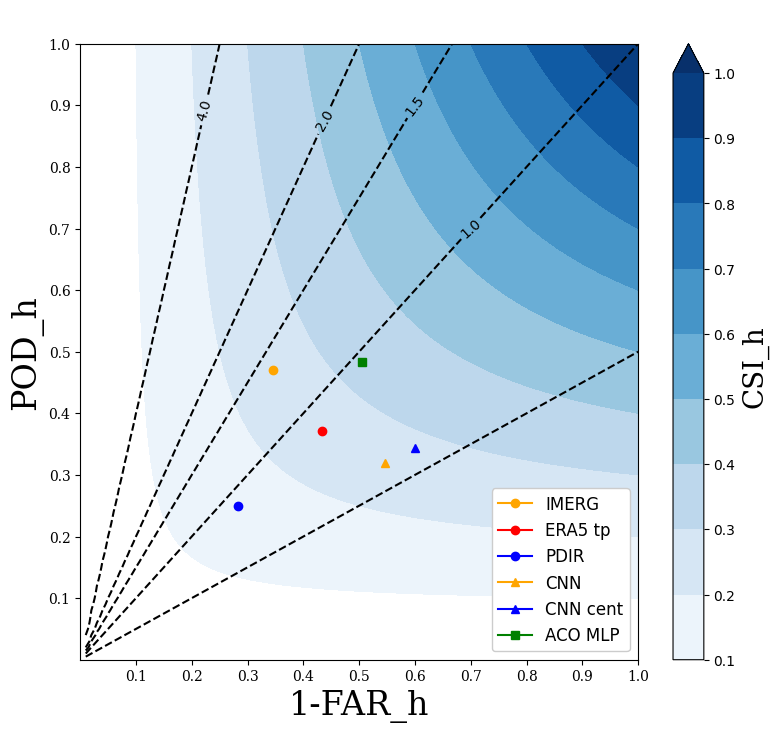

In [51]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
   
condition ='h'

con = 'heavy'

Dict = {
         'IMERG'  : ('o' , "Orange"),
        'ERA5_tp' : ('o'  , 'red'),
        'PDIR' : ( 'o' , 'Blue'),
        'CNN'  : ( '^'  , 'Orange'),
        'CNN cent' :  ( '^'  ,  'Blue'),
        'ACO-MLP' :  ( 's'  ,  'green')
       
        }

products = list


range_x= np.arange(0.1 , 1.1 , 0.1)
range_y= np.arange(0.1 , 1.1 , 0.1)

csi_label = 'CSI_'+ condition
legend_params=dict(loc=4, fontsize=12, framealpha=1, frameon=True)
csi_cmap="Blues"


keys =list( ex.keys())
plt.figure(figsize= (9,8 ))
grid_ticks = np.arange(0, 1.01, 0.01)

sr_g, pod_g = np.meshgrid(grid_ticks, grid_ticks)
bias = pod_g / sr_g
csi = 1.0 / (1.0 / sr_g + 1.0 / pod_g - 1.0)

csi_contour = plt.contourf(sr_g, pod_g, csi, np.arange(0.1, 1.1, 0.1), extend="max", cmap=csi_cmap)
b_contour = plt.contour(sr_g, pod_g, bias, [0.5, 1, 1.5, 2, 4], colors="k", linestyles="dashed")
plt.clabel(b_contour, fmt="%1.1f", manual=[(0.2, 0.9), (0.4, 0.9), (0.6, 0.9), (0.7, 0.7)])

# colors = [ 'Orange' , 'Orange'  , 'Orange', 'Orange'  
#           ,'Red' , 'Red'  , 'Red' ,'Red'
#           ,'Blue' , 'Blue'  , 'Blue' , 'Blue' 
#           ,'Green' , 'Green'   , 'Green' , 'Green' 
#           ,  'Yellow' , 'Yellow' 
#           ]

# markers = ['o' , 's' , 'x'  ,'P'
#           ,'+' , 'X' , '^' ,'*'
#           ,'+' , 'X' , '^', '*'
#           ,'+' ,'X'  , '^' , '*'
#           , 's' , 'D'] 
            
font_size = 24
Family=  'serif' 
for product in Dict :

    #product = products[i]
    pod = ex['POD_' + con][product]
    far = ex['FAR_' + con][product]
    print(product  , pod , far)
    plt.plot(1-far,pod, marker=Dict[product][0], color=Dict[product][1], 
                label=product.replace("_dist", "").replace("-", " ").replace("_", " "))
    
cbar = plt.colorbar(csi_contour)
cbar.set_label(csi_label, fontsize=20, family=Family)
plt.xlabel('1-FAR_'  + condition, fontsize=font_size, family = Family)
plt.ylabel('POD_' + condition, fontsize=font_size, family=Family)
plt.xticks(range_x, family=Family)
plt.yticks(range_y, family=Family)
plt.title(' ', fontsize=font_size, fontweight="bold")

plt.legend(**legend_params  , )
plt.savefig('../New Fig/overall-'+condition+'.PNG', dpi=500, bbox_inches="tight")




In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
colors = [   "Orange" , 'red'  , 'Blue'  , 'green'  , 'cyan'  ,  'grey'  , 'Yellow' ]

shapes = [ 'o'  , '+'  , 'x'   , '^'  , 's']   

condition ='heavy'
c = 'h'


Dict = {
         'IMERG'  : ('o' , "Orange"),
        'ERA5_tp' : ('o'  , 'red'),
        'PDIR' : ( 'o' , 'Blue'),
        'CNN'  : ( '^'  , 'Orange'),
        'CNN cent' :  ( '^'  ,  'Blue'),
        'ACO-MLP' :  ( 'x'  ,  'green')
       
        }


folder_out = '../New Fig/states/'

import os

try: os.mkdir(folder_out)
except: pass

Folder_inputs = r'D:\Projects\precipitation_AUS\new_results\RESULTS-by_state/'

files = os.listdir( Folder_inputs) 

for state in range(len(files)):
        file = files[state]
        fp  = Folder_inputs + file


        ex = pd.read_excel(fp)
        
        products = ex['Product']
        


        range_x= np.arange(0.1 , 1.1 , 0.1)
        range_y= np.arange(0.1 , 1.1 , 0.1)

        csi_label = 'CSI_'+ c
        legend_params=dict(loc=4, fontsize=12, framealpha=1, frameon=True)
        csi_cmap="Blues"


        keys =list( ex.keys())
        plt.figure(figsize= (9,8 ))
        grid_ticks = np.arange(0, 1.01, 0.01)

        sr_g, pod_g = np.meshgrid(grid_ticks, grid_ticks)
        bias = pod_g / sr_g
        csi = 1.0 / (1.0 / sr_g + 1.0 / pod_g - 1.0)

        csi_contour = plt.contourf(sr_g, pod_g, csi, np.arange(0.1, 1.1, 0.1), extend="max", cmap=csi_cmap)
        b_contour = plt.contour(sr_g, pod_g, bias, [0.5, 1, 1.5, 2, 4], colors="k", linestyles="dashed")
        plt.clabel(b_contour, fmt="%1.1f", manual=[(0.2, 0.9), (0.4, 0.9), (0.6, 0.9), (0.7, 0.7)])

        # colors = [ 'Orange' , 'Orange'  , 'Orange', 'Orange'  
        #           ,'Red' , 'Red'  , 'Red' ,'Red'
        #           ,'Blue' , 'Blue'  , 'Blue' , 'Blue' 
        #           ,'Green' , 'Green'   , 'Green' , 'Green' 
        #           ,  'Yellow' , 'Yellow' 
        #           ]

        # markers = ['o' , 's' , 'x'  ,'P'
        #           ,'+' , 'X' , '^' ,'*'
        #           ,'+' , 'X' , '^', '*'
        #           ,'+' ,'X'  , '^' , '*'
        #           , 's' , 'D'] 
                
        font_size = 24
        Family=  'serif' 
        for i in range(len(Dict)) :
                product = products[i]
                pod = ex['POD_' + condition][i]
                far = ex['FAR_' + condition][i]
                plt.plot(1-far,pod, marker=Dict[product][0], color=Dict[product][1], 
                                label=product.replace("_dist", "").replace("-", " ").replace("_", " "))
                
        cbar = plt.colorbar(csi_contour)
        cbar.set_label(csi_label, fontsize=20, family=Family)
        plt.xlabel('1-FAR_'  + c, fontsize=font_size, family = Family)
        plt.ylabel('POD_' + c, fontsize=font_size, family=Family)
        plt.xticks(range_x, family=Family)
        plt.yticks(range_y, family=Family)
        plt.title(' ', fontsize=font_size, fontweight="bold")

        plt.legend(**legend_params  , )
        plt.savefig(folder_out+ '/prf-'+ file +'_'+condition+'.PNG', dpi=500, bbox_inches="tight")



# Exclude n < 5

In [17]:
import pandas as pd 
import numpy as np

condition = 'heavy'
ex_heavy = pd.read_excel('../results/obs_analyze/'+condition+'-test.xlsx')

Folder = r"D:\Projects\precipitation_AUS\new_results/Criteria/"

for cr in ['CSI_heavy'   , 'r_heavy'  , 'KGE_heavy' , 'RMSE_heavy']:
    ex_cr = pd.read_excel(Folder +cr+'.xlsx')
    names = ex_heavy[ex_heavy['n']>=5]['NAME'].values
    for i in range(len(ex_cr)) :
        if ex_cr['Unnamed: 0'][i] not in names :
            ex_cr = ex_cr.drop(i)
    ex_cr.to_excel(Folder+cr+'_5.xlsx')


In [31]:
# -*- coding: utf-8 -*-
"""
Created on Mon Aug 15 16:55:01 2022

@author: reza
"""




import numpy as np
import matplotlib.pyplot as plt
from matplotlib.projections import PolarAxes
import mpl_toolkits.axisartist.grid_finder as gf
import mpl_toolkits.axisartist.floating_axes as fa

class TaylorDiagram(object):
    def __init__(self, STD ,fig=None, rect=111, label='_'):
      self.STD = STD
      tr = PolarAxes.PolarTransform()
      # Correlation labels
      rlocs = np.concatenate(((np.arange(11.0) / 10.0), [0.95, 0.99]))
      
      tlocs = np.arccos(rlocs) # Conversion to polar angles
      gl1 = gf.FixedLocator(tlocs) # Positions
      tf1 = gf.DictFormatter(dict(zip(tlocs, map(str, rlocs))))
      # Standard deviation axis extent
      self.smin = 0
      self.smax = 6.4  #1.0 * self.STD
      gh = fa.GridHelperCurveLinear(tr,extremes=(0,(np.pi/2),self.smin,self.smax),grid_locator1=gl1,tick_formatter1=tf1)
      if fig is None:
        fig = plt.figure()
      ax = fa.FloatingSubplot(fig, rect, grid_helper=gh )
      fig.add_subplot(ax)
      # Angle axis
      
      ax.axis['top'].set_axis_direction('bottom')
      ax.axis['top'].label.set_text("Correlation coefficient"  )
      ax.axis['top'].toggle(ticklabels=True, label=True)
      ax.axis['top'].major_ticklabels.set_axis_direction('top')
      ax.axis['top'].label.set_axis_direction('top')
      
      ax.axis['top'].label.set_color('green')
      
      
      # X axis
      ax.axis['left'].set_axis_direction('bottom')
      ax.axis['left'].label.set_text("Root Mean Square Error")
      ax.axis['left'].toggle(ticklabels=False, label=True  )
      ax.axis['left'].major_ticklabels.set_axis_direction('bottom')
      ax.axis['left'].label.set_axis_direction('bottom')
      
      ax.axis['left'].label.set_color('blue')
      
      # Y axis
      ax.axis['right'].set_axis_direction('top')
      ax.axis['right'].label.set_text("Standard deviation")
      ax.axis['right'].toggle(ticklabels=True, label=True)
      ax.axis['right'].major_ticklabels.set_axis_direction('left')
      ax.axis['right'].label.set_axis_direction('top')
      
      ax.axis['right'].label.set_color('green')
      # Useless
      
      ax.axis['bottom'].set_visible(False)
      
      
      
      ax.grid(visible=' - -', which='major', linestyle='dashed', axis= 'both' , linewidth=1.5,  color= 'black'  )
      

      # Contours along standard deviations
      
      self._ax = ax # Graphical axes
      self.ax = ax.get_aux_axes(tr) # Polar coordinates
      # Add reference point and STD contour
      l , = self.ax.plot([0], self.STD, 'k*', ls='', ms=12, label=label  )
      l1 , = self.ax.plot([0], self.STD, 'k*', ls='', ms=12, label=label)
      t = np.linspace(0, (np.pi / 2.0))
      t1 = np.linspace(0, (np.pi / 2.0))
      r = np.zeros_like(t) + self.STD
      r1 = np.zeros_like(t) + self.STD
      self.ax.plot(t, r, 'k--', label='_'  )
      # Collect sample points for latter use (e.g. legend)
      self.samplePoints = [l]
      self.samplePoints = [l1]
      
      # ax.grid(visible='=' , which='major', color='red' , linewidth=0.3)
      # ax.grid(  visible='-' , which='major', color='blue', axis='x' ,  linewidth=0.6)
      
      # ax.grid(visible=' - -', which='major', linestyle='--', axis='y', linewidth=0.3,  color= 'red' )
      
      # ax.grid(visible=' - -', which='major', linestyle='--', axis='x', linewidth=0.3,  color= 'blue' )
      
    
    
    
    
    def add_sample(self,STD,r,*args,**kwargs):
      l,= self.ax.plot(np.arccos(r), STD,ms=15, *args, **kwargs) # (theta, radius)
      self.samplePoints.append(l)
      return l
    
    def add_sample(self,STD,r1,*args,**kwargs):
      l1,= self.ax.plot(np.arccos(r1), STD,ms=15, *args, **kwargs) # (theta, radius)
      self.samplePoints.append(l1)
      return l1
    
    def add_contours(self,levels=5,**kwargs):
      rs, ts = np.meshgrid(np.linspace(self.smin, self.smax), np.linspace(0, (np.pi / 2.0)))
      RMSE=np.sqrt(np.power(self.STD, 2) + np.power(rs, 2) - (2.0 * self.STD * rs  *np.cos(ts)))
      contours = self.ax.contour(ts, rs, RMSE, levels, **kwargs)
      return contours

    
def Fig_Tay(obsSTD, S , r  , l , Dict, fname):
    
    fig=plt.figure(figsize=(8,8))
    dia=TaylorDiagram(obsSTD, fig=fig, rect=111, label='ref')
    plt.clabel(dia.add_contours(colors= [ 'blue'  ]), inline=1, fontsize=15)

     
    for i in range(len(S)):
        p = l[i]
        dia.add_sample(S[i], r[i], label=l[i],  marker=Dict[p][0],mec = 'black', mfc = Dict[p][1], mew=2.5)
    Family=  'serif' 
    spl = [p.get_label() for p in dia.samplePoints]
    fig.legend(dia.samplePoints, spl, numpoints=1, prop=dict(size='small'), loc=[0.7,0.3])
    
    plt.show()












In [32]:

import pandas as pd

fp = r'../results/overal_eval-final.xlsx'
output = r'../Fig/taylor.JPEG'

ex = pd.read_excel(fp)





In [33]:
Dict = {
         'IMERG'  : ('o' , "Orange"),
        'ERA5_tp' : ('o'  , 'red'),
        'PDIR' : ( 'o' , 'Blue'),
        'CNN_RA_(3,3)'  : ( '*'  , 'Orange'),
        'CNN_RA_(5,5)' :  ( '*'  ,  'red'),
        'CNN_RA_(7,7)' :  ( '*'  ,  'Blue'),
        'CNN_RA_C_(3,3)' :  ( '^'  ,  'Orange'),
        'CNN_RA_C_(5,5)' :  ( '^'  ,  'red'),
        'CNN_RA_C_(7,7)' :  ( '^'  ,  'Blue'),
        'ACO-NN' :  ( 'x'  ,  'green'),
        }

In [34]:
ex = ex.T
ex.columns = ex.values[0]
ex = ex.drop('Unnamed: 0')
ex = ex.drop('BP-ACO')
ex.index = Dict.keys()

C:\Users\S4055367\AppData\Local\Temp\ipykernel_15580\2468582849.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obsSTD = ex['obs_std'][0]
C:\Users\S4055367\AppData\Local\Temp\ipykernel_15580\3835320142.py:125: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dia.add_sample(S[i], r[i], label=l[i],  marker=Dict[p][0],mec = 'black', mfc = Dict[p][1], mew=2.5)


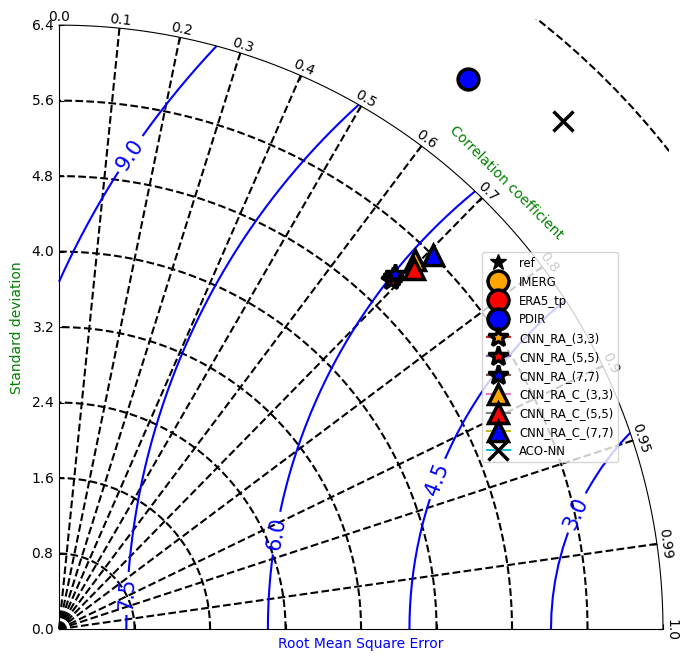

In [35]:


Labels = list( Dict.keys())

obsSTD = ex['obs_std'][0]


STD  = ex['std']

Cor = ex['r']


Fig_Tay(obsSTD, STD , Cor  , Labels ,Dict,  output)


In [65]:
dft[dft['PRCP'] > 60 ][dft['YEAR'] == 2024  ][dft['MONTH'] == 1  ]

C:\Users\S4055367\AppData\Local\Temp\ipykernel_34136\2927305903.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dft[dft['PRCP'] > 60 ][dft['YEAR'] == 2024  ][dft['MONTH'] == 1  ]
C:\Users\S4055367\AppData\Local\Temp\ipykernel_34136\2927305903.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dft[dft['PRCP'] > 60 ][dft['YEAR'] == 2024  ][dft['MONTH'] == 1  ]


,STATION,NAME,LATITUDE,LONGITUDE,YEAR,MONTH,DAY,PRCP,STATE_CODE,CAL_P,...,"CNN_RA_(3,3)","CNN_RA_(5,5)","CNN_RA_(7,7)","CNN_RA_C_(3,3)","CNN_RA_C_(5,5)","CNN_RA_C_(7,7)",ACO-NN,ERA5_cape,ERA5_t2m,ERA5_tcw
1023320,94595199999,b'AMBERLEY',-27.640556,152.711944,2024,1,27,70.32,3,137.732330,...,35.496994,37.442951,38.035206,34.641396,41.972649,52.931210,72.701032,935.168503,302.898812,63.725680
1031284,95296099999,b'AYR ALVA BEACH',-19.450000,147.483333,2024,1,10,100.80,2,50.532684,...,26.071602,26.399340,30.666965,25.943893,28.697536,26.383249,35.483277,612.761967,300.358535,62.104194
1032393,95295099999,b'AYR DPI RESEARCH STATION',-19.616667,147.383333,2024,1,10,83.52,2,22.745573,...,20.762373,17.902903,20.237160,19.725969,22.451128,22.904373,30.606218,612.761967,300.358535,62.104194
1039058,94596099999,b'BALLINA AIRPORT AWS',-28.833333,153.550000,2024,1,15,144.00,4,42.377945,...,42.187492,52.941128,60.332378,58.500980,52.437500,61.228996,84.333752,561.319371,296.806637,53.393468
1041299,94125099999,b'BATCHELOR AERO',-13.050000,131.016667,2024,1,12,76.08,1,88.742928,...,49.252953,46.605373,47.882313,43.322430,46.066345,57.497524,79.102578,540.342555,299.766666,68.066799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505055,94288099999,b'CAIRNS RACECOURSE',-16.950000,145.750000,2024,1,11,95.76,3,31.500935,...,32.529003,31.430323,43.279858,46.529232,50.828148,40.879330,55.805425,291.217020,298.454754,66.062329
1505056,94288099999,b'CAIRNS RACECOURSE',-16.950000,145.750000,2024,1,12,69.60,3,22.482637,...,30.092501,32.129997,44.296650,51.521214,47.637093,36.911854,50.243395,178.366117,297.879740,61.428156
1505057,94288099999,b'CAIRNS RACECOURSE',-16.950000,145.750000,2024,1,13,86.16,3,31.968962,...,36.697254,34.703522,45.003422,62.985897,59.956657,47.059978,64.470116,435.337854,297.742130,64.018735
1509525,94873199999,b'PUCKAPUNYAL LYON HILL DEFENCE',-36.940000,145.050000,2024,1,7,80.40,2,55.640270,...,46.960449,49.915470,48.495033,42.853420,46.820374,47.794529,65.499887,214.225444,292.921349,48.779332


# Disaster Days

In [14]:
disaster_18_March_2021 = dft[dft['YEAR'] == 2021][dft['MONTH'] == 3][dft['DAY'] == 18]
disaster_May_2022_12 = dft[dft['YEAR'] == 2022][dft['MONTH'] == 5][dft['DAY'] == 12]
disaster_Feb_2022 = dft[dft['YEAR'] == 2022][dft['MONTH'] == 2]

C:\Users\S4055367\AppData\Local\Temp\ipykernel_31360\612634097.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disaster_18_March_2021 = dft[dft['YEAR'] == 2021][dft['MONTH'] == 3][dft['DAY'] == 18]
C:\Users\S4055367\AppData\Local\Temp\ipykernel_31360\612634097.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disaster_18_March_2021 = dft[dft['YEAR'] == 2021][dft['MONTH'] == 3][dft['DAY'] == 18]
C:\Users\S4055367\AppData\Local\Temp\ipykernel_31360\612634097.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disaster_May_2022_12 = dft[dft['YEAR'] == 2022][dft['MONTH'] == 5][dft['DAY'] == 12]
C:\Users\S4055367\AppData\Local\Temp\ipykernel_31360\612634097.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disaster_May_2022_12 = dft[dft['YEAR'] == 2022][dft['MONTH'] == 5][dft['DAY'] == 12]
C:\Users\S4055367\AppData\Local\Temp\ipykernel_31360\612634097.py:3:

In [15]:
disaster_18_March_2021.to_excel(r"D:\Projects\precipitation_AUS\IMAGES\observation\disaster_May_2022_12.xlsx")

In [59]:
disaster = disaster_May_2022

C:\Users\S4055367\AppData\Local\Temp\ipykernel_15036\2132041644.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disaster_May_2022 = dft[dft['YEAR'] == 2022][dft['MONTH'] == 5]


In [61]:

import evaluation_tools

ms = needed_keys[8:-3]

products = ms

out = []
for m in ms :
    ev = evaluation_tools.evaluation_criteria(  np.array(disaster[obs_key])  , np.array( disaster[m])  , th =1 , threshold_heavy= 25  , threshold_ex= 60 ) 
    out.append(ev) 

out = pd.DataFrame(out , index = ms)
result = out.T


In [63]:
result

,STATE_CODE,CAL_P,HQ_P,PDIR(0),ERA5_tp,"CNN_RA_(3,3)","CNN_RA_(5,5)","CNN_RA_(7,7)","CNN_RA_C_(3,3)","CNN_RA_C_(5,5)","CNN_RA_C_(7,7)",ACO-NN
r,-0.018051,0.474754,0.435778,0.283445,0.590801,0.619833,0.618537,0.633172,0.647305,0.653848,0.644153,0.639673
NSE,-0.062058,-0.605599,0.09609,-0.58358,0.201133,0.375429,0.375596,0.396941,0.411501,0.424782,0.41254,0.323989
RMSE,8.58269,10.552804,7.917934,10.480194,7.44366,6.581734,6.580854,6.467392,6.388841,6.31634,6.383202,6.847409
MAE,4.322261,2.990027,2.258344,2.839197,2.230355,2.104022,2.130514,2.087537,2.183291,2.1019,2.006585,2.025057
MBE,0.748021,0.460151,-1.976415,-0.62985,0.251248,-0.087609,-0.046218,-0.210179,0.076974,-0.07347,-0.19398,-0.008421
PBIAS,30.400111,18.700871,-80.3229,-25.597552,10.2109,-3.560495,-1.878344,-8.541811,3.128297,-2.985868,-7.88348,-0.342236
KGE,-0.321007,0.322636,-0.240106,0.233221,0.577466,0.522249,0.515557,0.512739,0.556794,0.544474,0.519687,0.633213
spearman,0.010784,0.466682,0.444978,0.360778,0.652563,0.629997,0.630322,0.631568,0.622678,0.621174,0.639944,0.650245
std,1.79062,11.531715,2.016645,9.117182,8.113388,5.936793,5.846175,5.753638,6.108125,5.874662,5.722924,7.758104
obs_std,8.328165,8.328165,8.328165,8.328165,8.328165,8.328165,8.328165,8.328165,8.328165,8.328165,8.328165,8.328165


<Axes: xlabel='CAL_P', ylabel='PRCP'>

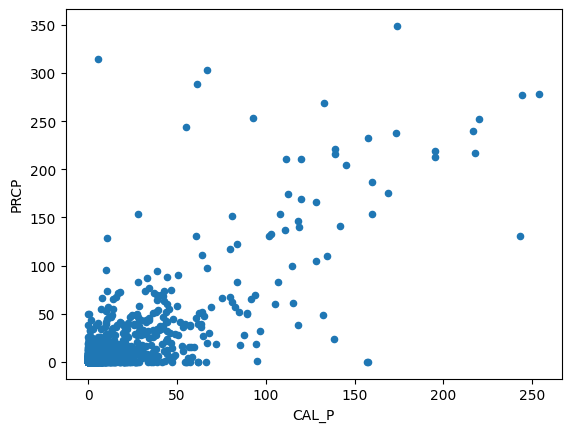

In [49]:
var_1 = 'CAL_P'
var_2 = 'PRCP'

disaster.plot.scatter(x=var_1 ,
                y=var_2 )
                

<Axes: xlabel='ACO-NN', ylabel='PRCP'>

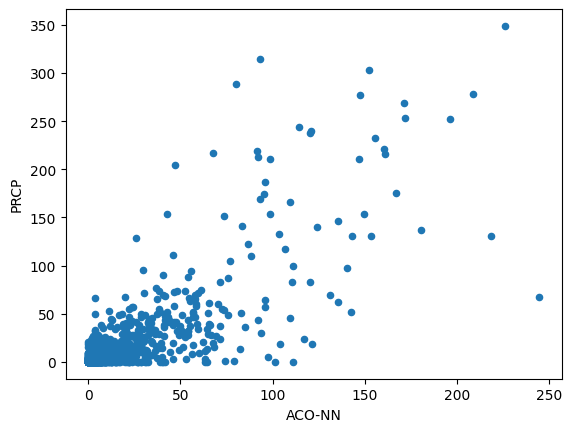

In [50]:
var_1 = 'ACO-NN'
var_2 = 'PRCP'

disaster.plot.scatter(x=var_1 ,
                y=var_2 )

In [28]:

of = '../results/evaluation_data_disaster_(24~28-02-2022).xlsx' 
result.to_excel(of)

In [17]:
stations = disaster['NAME'].unique()

In [16]:
disaster = disaster[ disaster['DAY'] > 22]

In [58]:
encoding = 'utf-8'
out = [ ]
for name in  names: 
    qdf = disaster[ disaster['NAME'] == name ]
    del qdf['NAME']
    qdf = qdf.mean()
    qdf['NAME'] = name.decode(encoding) 
    K =list( qdf.index)
    qdf = pd.DataFrame( list(qdf.values) ).T
    qdf.columns = K
    out.append(qdf )

out_df = pd.concat(out  )  

In [60]:
out_df.to_excel(r'../results/averaged_disaster_(25-02-2022).xlsx' )

In [181]:
import os
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
fp =  r"D:\Projects\precipitation_AUS/new_results/Disaster/2022-02-23.xlsx"

st_df = pd.read_excel(fp)
'''
st_df = st_df.dropna()
try : del st_df['Unnamed: 0.1']
except: pass
#st_df.columns = pr'''

# Assuming df is your existing DataFrame with 'X' and 'Y' columns

gdf = gpd.GeoDataFrame(st_df , geometry= gpd.points_from_xy(st_df.LONGITUDE              , st_df.LATITUDE              ))
of = fp +r'.shp'
gdf.to_file( of)

KeyboardInterrupt: 

In [5]:
obs = dft['PRCP'].values

x= dft['CNN_RA_C_(7,7)'].values

In [6]:

def sgn(x , th):
    return ((x - th + ep ) / np.absolute(x - th  +ep)  + 1)/2 



ep =0.0000001

def CSI(  O , M ,th ):
    fo = sgn(O , th)
    fm = sgn(M ,th)
    return np.sum(fo * fm )  /  (np.sum(fo +fm) - np.sum(fo*fm))


In [7]:
from tqdm import tqdm

In [8]:
L = []
A = []
B = []

In [10]:

for a in tqdm( np.arange(-10 , 10 , 1), desc="Calculating ..." , ncols= 100  ,colour='blue'):
    for b in np.arange(-10 , 10 , 1):
        model = a*x+b
        l =  - CSI(obs , model  , 25) +np.mean((obs- model)**2)**0.5  #- CSI(obs , model  , 60)  +np.mean((obs- model)**2)**0.5 
        L.append(l)
        A.append(a)
        B.append(b)


Calculating ...: 100%|██████████████████████████████████████████████| 20/20 [00:09<00:00,  2.18it/s]


In [12]:
Loss = pd.DataFrame(  {'LOSS' : L  , 'a' : A   ,'b' : B})

In [16]:
q = Loss[Loss['b'] == 0 ]

In [9]:
q

NameError: name 'q' is not defined

<Axes: xlabel='a', ylabel='LOSS'>

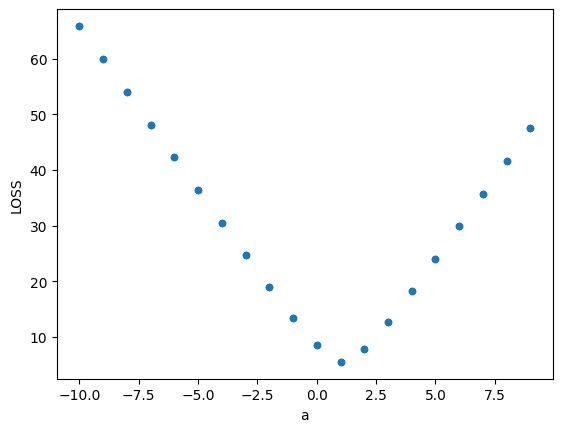

In [19]:
q.plot.scatter( 'a',  'LOSS'  )

In [164]:
model = 0.19*x#+b
l = - CSI(obs , model  , 25)

In [165]:
l  

-0.0015239256324291375

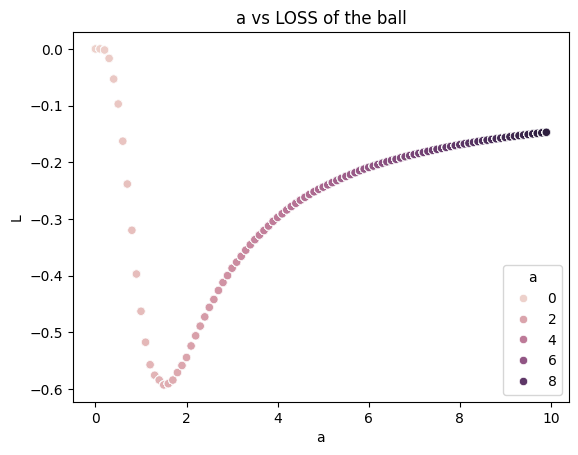

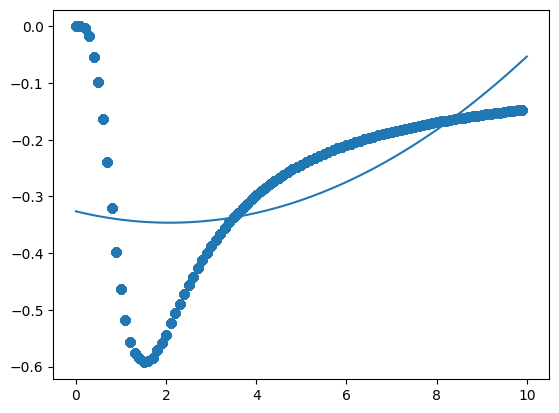

          2
0.004671 x - 0.0194 x - 0.3261
-3.3348846268852776


In [63]:

 
# importing packages and modules 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import r2_score 
import scipy.stats as stats 
dataset  = Loss

sns.scatterplot(data=Loss, x='a',  
                y='LOSS', hue='a') 
  
plt.title('a vs LOSS of the ball') 
plt.xlabel('a') 
plt.ylabel('L') 
plt.show() 
  
# degree 2 polynomial fit or quadratic fit 
model = np.poly1d(np.polyfit(dataset['a'], 
                             dataset['LOSS'], 2)) 
  
# polynomial line visualization 
polyline = np.linspace(0, 10, 100) 
plt.scatter(dataset['a'], dataset['LOSS']) 
plt.plot(polyline, model(polyline)) 
plt.show() 
  
print(model) 
  
# r square metric 
print(r2_score(dataset['a'],  
               model(dataset['LOSS']))) 

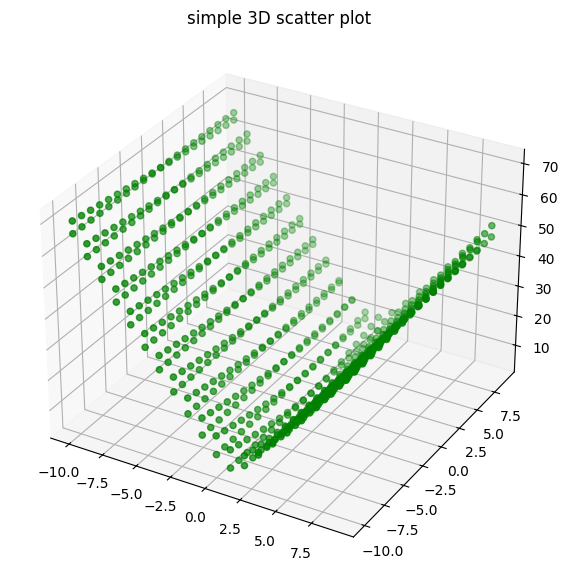

In [15]:


# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
# Creating dataset
df =Loss
x = df['a']
y = df['b']
z = df['LOSS']

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d" )
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()



In [86]:
283-273


10